# *Jogos de Tabuleiro - Uma Breve Análise*

1. Sobre o caso de estudo
2. Preparação de dados (ETL)
3. Análise exploratória e Visualização
4. Bibliografia de apoio

## 1. Sobre o caso de estudo:

![bg.jpeg](https://drive.google.com/uc?export=view&id=194AqGHShe-Odn1bPjKpz-ox--rQNo8v9)



Os jogos de tabuleiro são uma forma de entretenimento que existe desde muito antes de o mundo ser minimamente parecido com o que é hoje, uma criação antiga, que inspira até hoje o desenvolvimento de novos jogos dos mais diversos temas possíveis.

O objetivo desta análise é fazer uma breve exploração acerca do prestígio e da complexidade dos jogos ao longo dos anos, da captação do consumidor e correlações gerais ao redor do engajamento de jogadores em avaliações e comentários.
E é claro, tudo com base em dados! 

## 2. Preparação de Dados:

In [ ]:
# importando as bibliotecas necessárias 
import pandas as pd
import seaborn as sb   
import matplotlib.pyplot as plt 

In [ ]:
# fazendo leitura do dataframe fornecido
df = pd.read_csv('/content/drive/MyDrive/Datasets/boardgames_dataset.csv', sep = ';', index_col = 2)

In [ ]:
# lendo dez primeiras linhas
df.head(5)

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
sortindex,,,,,,,,,,,,,,,,,
1,Gloomhaven,2017,1,4,60,120,12,31254,8.85292,1.59819,3.8078,1311,5972,['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...","['Campaign Games', 'Components: Miniatures', '..."
2,Pandemic Legacy Season 1,2015,2,4,60,60,13,34729,8.62499,1.59463,2.8301,971,5477,['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...","['Campaign Games', 'Legacy', 'Pandemic']"
3,Terraforming Mars,2016,1,5,120,120,12,48339,8.42299,1.36938,3.2313,1863,7274,['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Fryxgames Future Timeline', 'Planets: Mars',..."
4,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,18269,8.49419,1.49542,4.3850,891,2660,['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...","['Tableau Building', 'Through the Ages']"
5,Brass Birmingham,2018,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England..."


Descrição de algumas colunas

* `boardgamecategory`: Categoria do jogo de tabuleiro
* `boardgamemechanic`: Tipo de mecânica (por exemplo, memória, coleta de componentes, blefe)
* `average`: Avaliação média dada ao jogo pelos usuários (0-10)
* `avgweight`: Média de todos os pesos subjetivos (0-5)
* `numcomments`: Número de comentários dado ao jogo via BoardGameGeek
* `numweights`: Número de votos em peso (dificuldade)
* `usersrated`: Número de avaliações de usuários no jogo


In [ ]:
# tamanho do dataframe (linhas, colunas)
df.shape

(20000, 17)

In [ ]:
# identificando se há falta de dados no dataset (valores nulos)
df.isnull().sum()

name                 0
yearpublished        0
minplayers           0
maxplayers           0
minplaytime          0
maxplaytime          0
minage               0
usersrated           0
average              0
stddev               0
avgweight            0
numweights           0
numcomments          0
boardgamehonor       0
boardgamecategory    0
boardgamemechanic    0
boardgamefamily      0
dtype: int64

In [ ]:
# informações gerais sobre as colunas: tipo de dado, total de entradas
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               20000 non-null  object 
 1   yearpublished      20000 non-null  int64  
 2   minplayers         20000 non-null  int64  
 3   maxplayers         20000 non-null  int64  
 4   minplaytime        20000 non-null  int64  
 5   maxplaytime        20000 non-null  int64  
 6   minage             20000 non-null  int64  
 7   usersrated         20000 non-null  int64  
 8   average            20000 non-null  float64
 9   stddev             20000 non-null  float64
 10  avgweight          20000 non-null  float64
 11  numweights         20000 non-null  int64  
 12  numcomments        20000 non-null  int64  
 13  boardgamehonor     20000 non-null  object 
 14  boardgamecategory  20000 non-null  object 
 15  boardgamemechanic  20000 non-null  object 
 16  boardgamefamily    200

Observação: Dataset aparentemente já tratado.

## 3. Análise Exploratória e Visualização:

#### 3.1 Lançamento de Jogos ao Longo do Tempo

3.1.1 Ops! Erros foram encontrados no dataset...

Durante a análise de dados, pretendia-se obter informações gráficas sobre o lançamento de novos jogos de tabuleiro de acordo com cada ano. Porém, primeiramente valia a pena ver a amplitude de tempo para ter uma noção de qual gráfico poderia se adequar melhor e, neste momento, descobriu-se alguns erros quanto aos anos presentes no conjunto de dados, alguns não estão nulos, porém registrados como ano zero, o que não existe. Além disso, também há zeros atribuídos às colunas de quantidade mínima e máxima de jogadores, o que também está incorreto.

Primeiramente, foram procuradas as linhas cujas cinco colunas a seguir estão com zeros simultaneamente: yearpublished, maxplayers, minplayers, minplaytime, maxplaytime. Descobriu-se que são muito poucas, exatamente nove. Sendo assim, optou-se por excluí-las do conjunto de dados.
Bom, considerando que jogos de tabuleiro são, em sua grande maioria, jogos para jogar com outras pessoas, os espaços em que o mínimo de jogadores está ocupado com o número zero, foi trocado para dois. Além disso, foi encontrado o número dois nas três medidas de tendência central, o que contribuiu para tal decisão.
Já para trocar os espaços em que o máximo de jogadores está ocupado erroneamente de maneira análoga, observou-se os números na coluna maxplayers utilizando .value_counts() e gráfico de dispersão. Como há claramente um outlier, não é adequado usar a média como valor de substituição. 

O que se pôde observar é que predominam jogos com quatro pessoas, sendo esse o valor tanto da mediana quanto da moda. Assim, considerando também que em comparação ao total de amostra disponível, esses erros não vão modificar grandemente o que já temos, optou-se por utilizá-lo na substituição dos zeros de maxplayers.

No caso do ano, como o intervalo numérico é bem maior, e há uma grande concentração ao redor dos anos 2000 por diversos motivos, concluiu-se que é muito provável que os jogos não datados também foram lançados nesse intervalo de pico que se inicia pós 1900. Assim, optou-se por distribuir esses jogos com lacunas zeradas em anos aleatórios no intervalo entre 1900 e 2020, pois acredita-se que, apesar não serem tantas linhas se comparado ao range total, isso fará com que análises aplicadas sejam muito pouco afetadas, ao contrário do que aconteceria atribuindo a um só ano o lançamento de todos os jogos não datados.

Por fim, uma observação a ser feita é que, com toda essa manipulação que foi feita, percebeu-se que algumas lacunas de nomes de jogos estão preenchidas apenas com letras combinadas com caracteres e números, logo, sem clareza. Contudo, como nesta análise o nome dos jogos não terá um papel importante, este foi um ponto ignorado na manipulação de dados.


In [ ]:
# quantidade de lançamentos registrados para cada ano
# alguns erros localizados!

x = df['yearpublished'] == 0
df.loc[x].head(3)

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
sortindex,,,,,,,,,,,,,,,,,
1416,Pichenotte,0,2,4,60,60,6,1478,7.00738,1.50184,1.4833,120,401,['None'],['Action / Dexterity'],"['Flicking', 'Team-Based Game']","['Carrom games', 'Finger Flicking Games']"
2571,Unpublished Prototype,0,0,0,0,0,0,705,6.93858,2.46193,2.4667,75,1013,['None'],['(Unpublished)'],['(Unpublished)'],"['Admin: Miscellaneous Placeholder', 'Admin: U..."
2789,Traditional Card Games,0,0,0,0,0,0,813,6.59868,1.68549,1.9683,63,373,['None'],"['Card Game', 'Game System']","['Card Game', 'Game System']","['Admin: Miscellaneous Placeholder', 'Traditio..."


Note os zeros indevidos acima!

In [ ]:
# filtragem das cinco colunas simultaneamente zeradas
fyear = df['yearpublished'] == 0
fminp = df['minplayers'] == 0
fmaxp = df['maxplayers'] == 0
fminpt = df['minplaytime'] == 0
fmaxpt = df['maxplaytime'] == 0

# exclusão das linhas
df.drop(df.loc[fyear & fminp & fmaxp & fminpt & fmaxpt].index, inplace=True)

#checagem 
#df.loc[fyear & fminp & fmaxp & fminpt & fmaxpt]

In [ ]:
print('Medidas de Tendência Central - Mínimo de Jogadores')
print('Média: ', df['minplayers'].mean())
print('Mediana: ', df['minplayers'].median())
print('Moda: ', df['minplayers'].mode())

Medidas de Tendência Central - Mínimo de Jogadores
Média:  2.056175278875494
Mediana:  2.0
Moda:  0    2
dtype: int64


In [ ]:
print('Medidas de Tendência Central - Máximo de Jogadores')
print('Média: ', df['maxplayers'].mean())
print('Mediana: ', df['maxplayers'].median())
print('Moda: ', df['maxplayers'].mode())

Medidas de Tendência Central - Máximo de Jogadores
Média:  5.594667600420189
Mediana:  4.0
Moda:  0    4
dtype: int64


In [ ]:
# contagem unitária por máximo de jogadores
print('mp   count')
x = df['maxplayers'].value_counts()
x.head(5)

mp   count


4    6074
2    4067
6    3834
5    2670
8    1201
Name: maxplayers, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


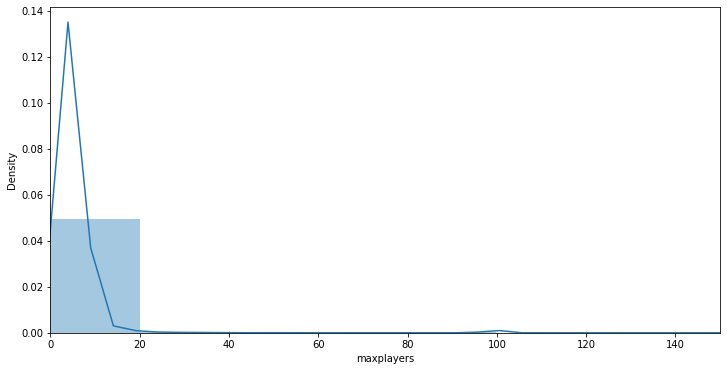

In [ ]:
# visualização gráfica de dispersão
ax = sb.distplot(df['maxplayers'])
ax.figure.set_size_inches(12, 6)
plt.xlim(0,150)
ax;

Há uma grande concentração de jogos com vinte ou menos jogadores (principalmente menos de dez). E uma pequena saliência no gráfico que indica provavelmente algumas unidades de jogos cujo fabricante recomenda até 100 jogadores.

In [ ]:
# substituição de valores em minplayers 
df['minplayers'].replace({0:2}, inplace=True)

In [ ]:
# e maxplayers
df['maxplayers'].replace({0:4}, inplace=True)

In [ ]:
print('Medidas de Tendência Central - Ano de Lançamento')
print('Média: ', df['yearpublished'].mean())
print('Mediana: ', df['yearpublished'].median())
print('Moda: ', df['yearpublished'].mode())

Medidas de Tendência Central - Ano de Lançamento
Média:  1982.160672302536
Mediana:  2008.0
Moda:  0    2016
dtype: int64


In [ ]:
yearZero = df['yearpublished'] == 0
qtde = len(df.loc[yearZero].value_counts())
print('Quantidade de anos faltantes no dataset: ', qtde)

Quantidade de anos faltantes no dataset:  179


In [ ]:
# substituindo anos zerados por anos aleatórios no intervalo 1900-2020
import random as rd

rd.seed(1)
df['yearpublished'].replace({0:rd.randint(1950, 2020)}, inplace=True)

Ufa! Agora continuemos a análise dos dados.  🕵

3.1.2 Visualização e informações

                            Lançamento de Jogos de Tabuleiro Por Ano


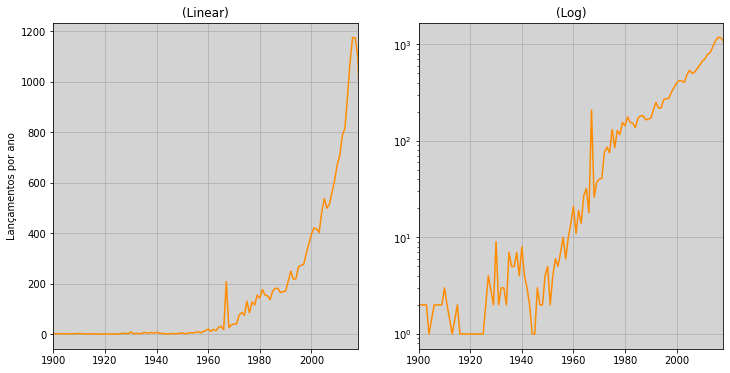

In [ ]:
print('                            Lançamento de Jogos de Tabuleiro Por Ano')
ax = plt.subplot(121)
df.yearpublished.value_counts().sort_index().loc[:2020].plot(color='darkorange').grid()
ax.set_facecolor('lightgrey')
ax.figure.set_size_inches(12, 6)
plt.xlim(1900,2018)
plt.title('(Linear)')
plt.ylabel('Lançamentos por ano');

ay = plt.subplot(122)
df.yearpublished.value_counts().sort_index().plot(color='darkorange').grid()
ay.set_facecolor('lightgrey')
ay.figure.set_size_inches(12, 6)
plt.xlim(1900,2018)
plt.yscale('log')
plt.title('(Log)');

Segundo matéria da Super Interessante (Abril) sobre jogos de tabuleiro, o mercado voltado a esse tipo de jogos tenderá a lucrar cada vez mais com o produto devido à busca de um público consumidor que procura sair do tédio e até por impactos do confinamento durante a pandemia, que fez as pessoas pensarem em novas e múltiplas formas de distração do estresse e ociosidade. 

O gráfico acima confirma o argumento da tendência crescente de consumo do produto, sobretudo após os anos 1980. 
Passou-se de aproximadamente um lançamento em 1900, para quase 200 em 1980. Um aumento de quase 200% em lançamentos que depois duplica em vinte anos chegando à quatrocentos lançamentos em 2000, apesar de uma leve estagnada nos anos 90.

Ainda assim, esses números comercialmente positivos não podem indicar, necessariamente, que se vê hoje a época de maior destaque para esses jogos, por vários motivos. Dentre eles, o fato de que atualmente é muito mais notada a era de ouro dos e-games que, devido ao avanço da tecnologia, pode permanecer como a principal forma de entretenimento via jogos que já existiu. Mas isso é assunto para outra análise de dados...

__________________________________________________________________________

#### 3.2 Avaliação de Jogos

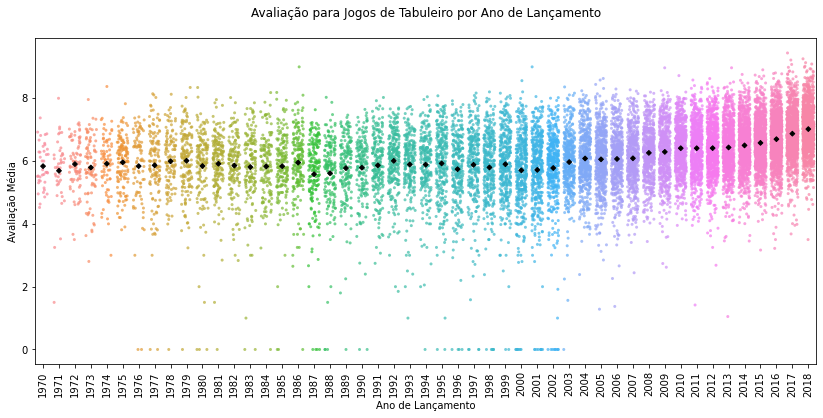

In [ ]:
anoFiltro = df['yearpublished'].between(1970,2018)

ax = sb.stripplot(x='yearpublished', y='average', data = df.loc[anoFiltro],
              zorder = 1, alpha = .7, s = 3, jitter = 0.35)

ay = sb.pointplot(x='yearpublished', y='average', data=df.loc[anoFiltro],
                  dodge = .532, join = False, color = 'k', markers = "D",
                  scale = .5, ci = None)

ax.figure.set_size_inches(14, 6)
ay.figure.set_size_inches(14, 6)

plt.xticks(rotation = 90)
locs, ticks = plt.xticks()
plt.xticks(locs, [str(int(float(x.get_text()))) for x in ticks]);
plt.title('Avaliação para Jogos de Tabuleiro por Ano de Lançamento\n')
plt.ylabel('Avaliação Média')
plt.xlabel('Ano de Lançamento');

Para um estudo de mercado bem conduzido e estratégias de venda, é mais do que válido estar a par da satisfação do cliente. Na situação em questão, essa noção é capaz de nos orientar a perceber na imagem acima que os consumidores de boardgames se sentem muito mais captados pelos jogos mais recentes do que pelos jogos antigos, haja vista a densidade de avaliações para jogos novos. Contudo, apesar de algumas pequenas variações a avaliação média nem chega em 8. 

O que nos faz crer que o público consumidor tende a ser bastante exigente, mas também muito aberto a contribuir com sua opinião. Isso ajudará no trabalho das empresas que estão na outra ponta criando as histórias dos jogos e pensando na divulgação comercial.

Certamente o contexto criado ao redor do jogo tem sido cada vez mais elaborado e há também um papel muito forte das estratégias de marketing digital e e-commerce, digamos que, "chamando" os apreciadores de boardgames a comprarem jogos mais recentes.

__________________________________________________________________________

#### 3.3 Complexidade dos Jogos do Período (1970-2018)


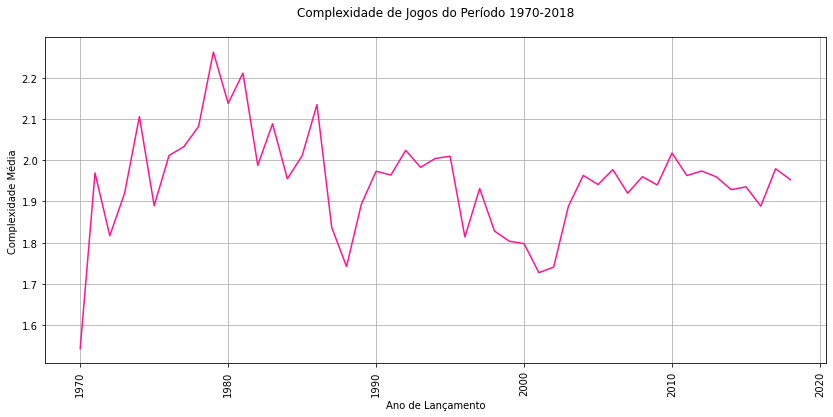

In [ ]:
anoFiltro = df['yearpublished'].between(1970,2018)

ax = sb.lineplot(x='yearpublished', y='avgweight', data = df.loc[anoFiltro], color='deeppink', ci=None)
plt.grid()
plt.xticks(rotation = 90)
ax.figure.set_size_inches(14, 6)
plt.title('Complexidade de Jogos do Período 1970-2018\n')
plt.ylabel('Complexidade Média')
plt.xlabel('Ano de Lançamento');

E por falar no contexto elaborado que engloba os jogos, a complexidade deles é uma característica muito relacionada. Na base de dados disponibilizada, há a avaliação média da dificuldade dos jogos dada pelos consumidores.

(Foi escolhido o subintervalo partindo de 1970, pois em visualização anterior é encontrado um pico de lançamento de jogos por volta desse ano. Assim, é interessante fazer uma análise específica.)

Na subpopulação que vai dos jogos lançados entre 1970 e 2018, a complexidade média teve seu pico nos anos 80 e uma grande variação entre 1.8 e 2.1. Esta informação indica que a taxa de dificuldade nos jogos não teve um crescimento gradual, na verdade, no intervalo pós 2000 houve uma certa estabilização próxima à média 2. Assim, o engajamento em comentários e avaliações mais concentrados nos anos recentes, não se relaciona com a complexidade dos jogos.

__________________________________________________________________________

#### 3.4 Correlações



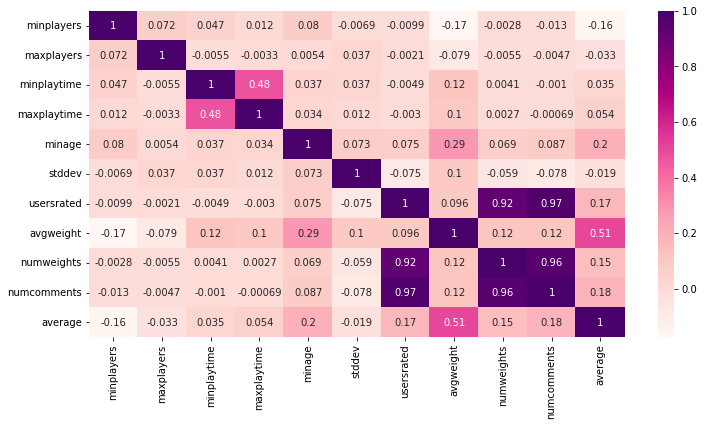

In [ ]:
# gráfico Heat Map sobre Correlação
plt.figure(figsize=(12,6))

sb.heatmap(df[[ 'minplayers',
                'maxplayers',
                'minplaytime',
                'maxplaytime',
                'minage',
                'stddev',
                'usersrated',
                'avgweight',
                'numweights',
                'numcomments',
                'average',
                ]].corr(),cmap='RdPu',annot=True);

De acordo com o coeficiente de correlação de Pearson, 1 indica alta correlação positiva (se uma variável cresce a outra também), -1 significa correlação negativa (se uma variável cresce a outra também, porém em direção oposta) e 0 é a falta de correlação.

Bom, através da figura acima percebe-se uma correlação desprezível entre as variáveis em geral. Alguns poucos casos isolados, em tom mais escuro é que se destacam.

As variáveis consigo mesmas tem correlação 1 sempre, não é algo a se levar em conta nesta análise.

Mas pontos interessantes a se falar são:

- a relativa correlação entre a média dada para dificuldade e a média atribuída à qualidade do jogo, assim há uma pequena correlação entre jogos mais difíceis e jogos mais bem avaliados (Desafios geram mais interesse!);

- a forte correlação entre número total de comentários e de avaliações para cada jogo. O que significa que jogos mais votados também são mais comentados. Engajamento chama atenção e gera curiosidade;

- a forte correlação entre quantidade de avaliações gerais e avaliações para dificuldade. O que faz total sentido, pois quem dá uma avaliação geral também tenderá a englobar em sua avaliação alguma crítica à dificuldade do jogo e, assim, fará uma avaliação à complexidade também.

__________________________________________________________________________

#### 3.5 Pesquisa de Popularidade

3.5.1 Variação do Tempo Máximo de Jogo - Jogos Novos vs Antigos

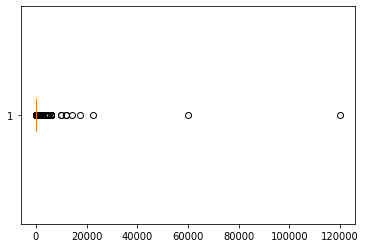

In [ ]:
# outlier
plt.boxplot(df['maxplaytime'], vert=False);

In [ ]:
# excluindo outliers 
df.drop(df.loc[df['maxplaytime'] > 10000].index, inplace=True)

In [ ]:
# jogos com maxplaytime muito alto
x = df['maxplaytime'] > 10000
df.loc[x]

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
sortindex,,,,,,,,,,,,,,,,,


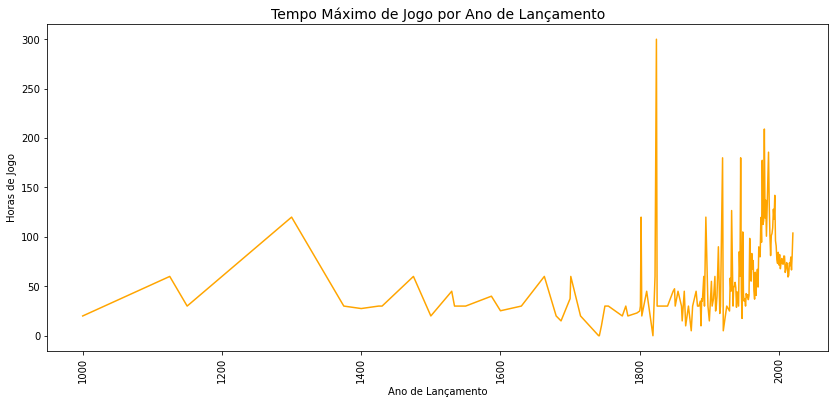

In [ ]:
filtroAno = df['yearpublished'].between(1000,2020)

ax = sb.lineplot(x='yearpublished', y='maxplaytime', data = df.loc[filtroAno],
                 color='orange', ci=None)

plt.xticks(rotation = 90)
ax.figure.set_size_inches(14, 6)
plt.title('Tempo Máximo de Jogo por Ano de Lançamento', fontsize = 14)
plt.ylabel('Horas de Jogo')
plt.xlabel('Ano de Lançamento');

Para obter o gráfico acima, inicialmente houve a correção de outliers localizada na coluna maxplaytime, que é o tempo máximo de jogo sugerido pelo fabricante e que tinha jogos com valor muito muito acima  do padrão. 

Bom, o tratamento de outlier varia muito de caso para caso, é válida a exclusão se não modificar quase nada do gráfico anterior ou se for assumido como um erro da base de dados que prejudica a análise final (o que era o caso aqui presente, o outliers mostrava um valor de pico fora da realidade).

Ainda assim, é importante lembra que há casos em que a abordagem correta poderia ser filtragem de dados, transformação logarítmica ou tratamento separado, o que faz da descoberta de outliers sempre algo a se analisar com calma e comparando o impacto das várias soluções para a análise.

Enfim, o gráfico indica uma considerável variação no tempo máximo de jogo, ainda mais para jogos mais novos (provavelmente pela variedade de tipos de jogos), contudo costuma ficar abaixo de 200h. 

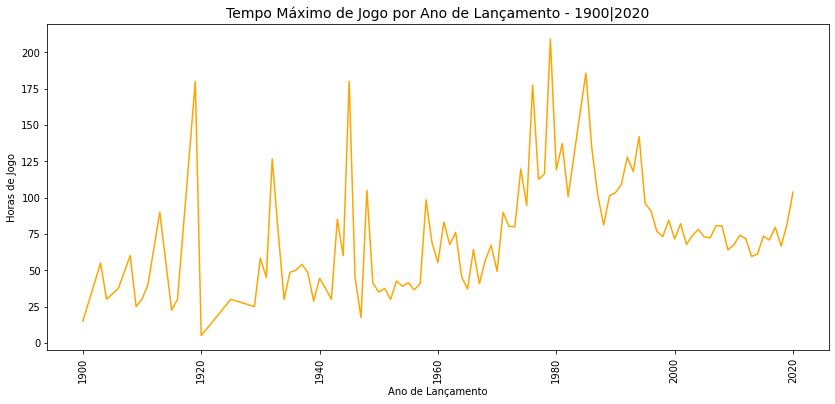

In [ ]:
filtroAno = df['yearpublished'].between(1900,2020)

ax = sb.lineplot(x='yearpublished', y='maxplaytime', data = df.loc[filtroAno], color='orange', ci=None)

plt.xticks(rotation = 90)
ax.figure.set_size_inches(14, 6)
plt.title('Tempo Máximo de Jogo por Ano de Lançamento - 1900|2020', fontsize = 14)
plt.ylabel('Horas de Jogo')
plt.xlabel('Ano de Lançamento');

Aproximando a lupa para o período de 1900 em diante, onde se notou grande variação na visualização comentada anteriormente, podemos perceber que os anos 1920, 1940 e 1980 foram agraciados com jogos de tabuleiro que tendiam a ser mais longos, enquanto no período pós 2000 houve certa estabilização abaixo de 100h.

Há a tentativa frequente de fugir do tédio em nossos tempos, mas jogos longos demais provavelmente também acabam sendo tediosos...

3.5.2 Engajamento Médio de Usuários vs Faixa Etária

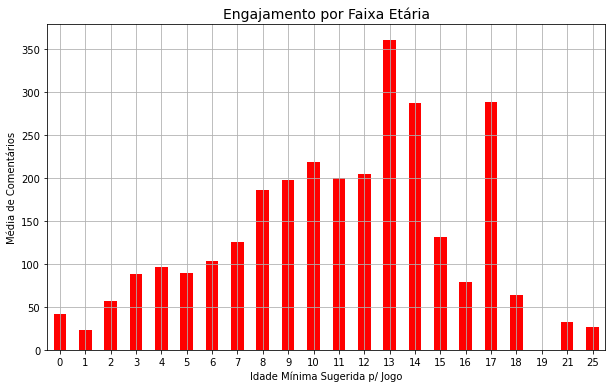

In [ ]:
df.groupby(['minage'])['numcomments'].mean().plot.bar(color = 'red',
                                                      figsize=(10,6)).grid()
plt.xlabel('Idade Mínima Sugerida p/ Jogo')
plt.ylabel('Média de Comentários')
plt.title('Engajamento por Faixa Etária', fontsize=14)
plt.xticks(rotation = 'horizontal');

Não só jogos de tabuleiro, mas jogos em geral costumam ter indicação de idade, e o gráfico destaca a concentração de comentários de jogadores acerca de jogos cuja faixa indicativa são 13, 17 e 14 respectivamente. 

Isso não nos fala sobre da idade do público consumidor, mas sim sobre o produto. Jogos de tabuleiro juvenis, provavelmente não tão simples e com peças e elementos variados (jogos infantis não costumam ter peças ou ter poucas, por segurança) geram mais interesse e envolvimento do consumidor com suas propostas e narrativas.

__________________________________________________________________________

## 4. Bibliografia de Apoio:

https://super.abril.com.br/especiais/quarentena-a-volta-dos-jogos-de-tabuleiro/

https://levelup.gitconnected.com/pearson-coefficient-of-correlation-using-pandas-ca68ce678c04

https://www.clusterdesign.com.br/quando-usar-escalas-logaritmica-e-aritmetica/

https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

https://dvatvani.github.io/

https://boardgamegeek.com/

